# Data visualization - Rotten tomatoes dataset

Link dataset: https://www.kaggle.com/datasets/thedevastator/rotten-tomatoes-top-movies-ratings-and-technical

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns

## Read data

In [2]:
data = pd.read_csv('rotten_tomatoes_top_movies.csv')
data.head()

,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...
3,3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,...,"May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",http://www.rottentomatoes.com/m/mad_max_fury_road
4,4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,...,"Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al...",http://www.rottentomatoes.com/m/spider_man_int...


## Cleaning data

For this visualization, I'll use 'critic_score','people_score','total_reviews', 'total_ratings' and 'type'. First, it's necessary to verify if there were null elements

In [3]:
data.shape

(1610, 26)

In [4]:
data[['critic_score','people_score','total_reviews','total_ratings','type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   critic_score   1610 non-null   int64  
 1   people_score   1609 non-null   float64
 2   total_reviews  1610 non-null   int64  
 3   total_ratings  1610 non-null   object 
 4   type           1610 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 63.0+ KB


### Remove the null element

In [5]:
data_non_null = data.dropna(subset=['people_score'])
data_non_null.shape

(1609, 26)

### Analyze the number of ratings

In [6]:
data_non_null['total_ratings'].unique()

array(['50,000+', '10,000+', '100,000+', '25,000+', '50,000+ Verified',
       '250,000+', '5,000+', '2,500+', '2,500+ Verified',
       '5,000+ Verified', '100+', '1,000+', '500+', '250+',
       '1,000+ Verified', '25,000+ Verified', '100+ Verified', '50+',
       'Fewer than 50', '250+ Verified', '10,000+ Verified',
       '50+ Verified'], dtype=object)

With this analysis, I decided to use only movies with 50+ ratings

### Remove movies with 'Fewer than 50' ratings

In [7]:
data_non_null_50_plus_ratings = data_non_null[data_non_null['total_ratings']!= 'Fewer than 50']
data_non_null_50_plus_ratings.shape

(1607, 26)

Only two movies were removed (Checked by data shape)

## Analyze and visualize Data

### Analysis and visualization of movies by 'total_reviews'

In [8]:
data_non_null_50_plus_ratings['total_reviews'].describe()

count    1607.000000
mean      143.812072
std       118.188936
min        39.000000
25%        56.000000
50%        91.000000
75%       206.000000
max       561.000000
Name: total_reviews, dtype: float64

In [9]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Total reviews')

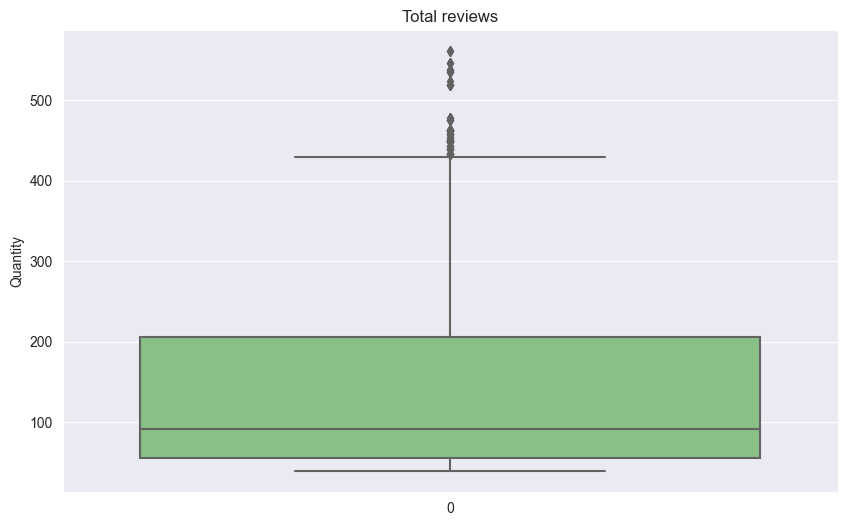

In [10]:
ax = sns.boxplot(data_non_null_50_plus_ratings['total_reviews'])
ax.figure.set_size_inches(10, 6)
ax.set_ylabel("Quantity")
ax.set_title("Total reviews")

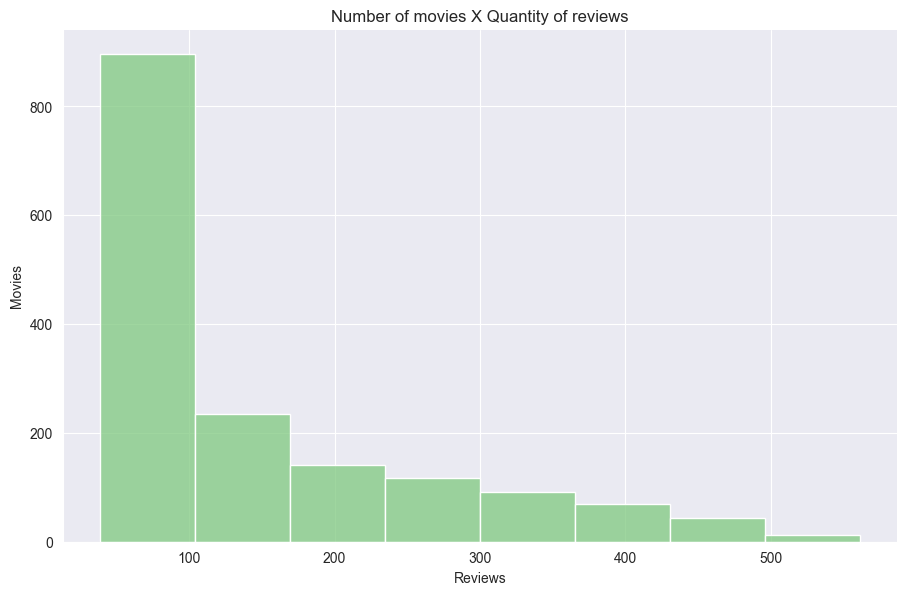

In [11]:
ax = sns.displot(data_non_null_50_plus_ratings['total_reviews'], bins=8)
ax.figure.set_size_inches(10, 6)
ax.set(title='Number of movies X Quantity of reviews',xlabel='Reviews', ylabel='Movies')

In [12]:
data_non_null_50_plus_ratings['total_reviews'].quantile(0.8)

240.80000000000018

With this analysis, it is concluded that fewer films have a greater amount of reviews.
This is confirmed by the method describe and the plotted graphics. The Percentil-80 confirms that 80% of films have less than 241 reviews.

### Analysis and visualization of movies by 'critic_score' and 'people_score'

In [13]:
data_non_null_50_plus_ratings['critic_score'].describe()

count    1607.000000
mean       92.682638
std        11.629614
min         2.000000
25%        92.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: critic_score, dtype: float64

In [14]:
data_non_null_50_plus_ratings['people_score'].describe()

count    1607.000000
mean       83.420037
std        11.262947
min        10.000000
25%        80.000000
50%        87.000000
75%        91.000000
max        98.000000
Name: people_score, dtype: float64

In [15]:
(data_non_null_50_plus_ratings['critic_score'].mean() - data_non_null_50_plus_ratings['people_score'].mean()).round(2)

9.26

[Text(0, 0, 'Critic Score'), Text(1, 0, 'People Score')]

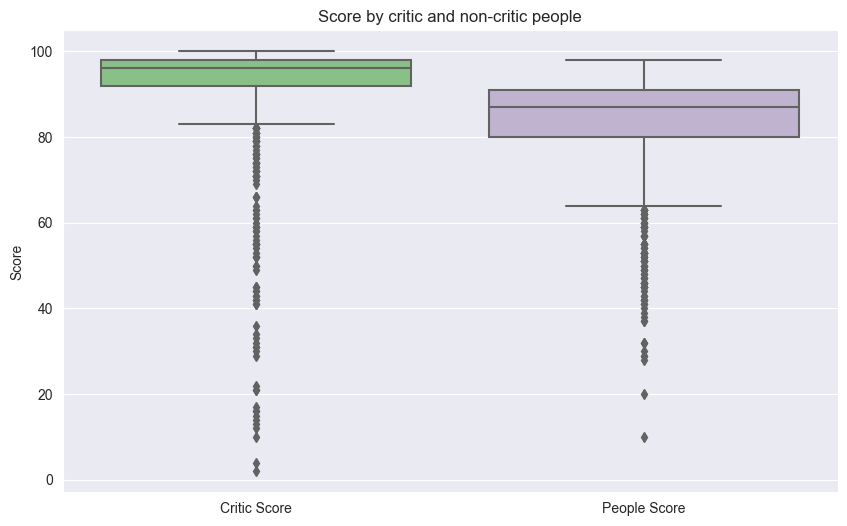

In [16]:
ax = sns.boxplot(data=data_non_null_50_plus_ratings[['critic_score','people_score']])
ax.figure.set_size_inches(10, 6)
ax.set_ylabel("Score")
ax.set_title("Score by critic and non-critic people")
ax.set_xticklabels(['Critic Score','People Score'])

In this analysis, the critics gave a higher rating to most of the movies present in the dataset.
The mean showed a difference of 9.26%.
Quartiles also showed lower values for the people score (non-critic).

### Analysis and visualization of movies by the type

In [40]:
total_by_type = data_non_null_50_plus_ratings['type'].value_counts()
total_by_type

Action & Adventure           100
Horror                       100
Special Interest             100
Science Fiction & Fantasy    100
Mystery & Suspense           100
Musical & Performing Arts    100
Animation                    100
Kids & Family                100
Drama                        100
Comedy                       100
Classics                     100
Art House & International    100
Romance                       99
Documentary                   98
Western                       84
Sports & Fitness              69
Television                    57
Name: type, dtype: int64

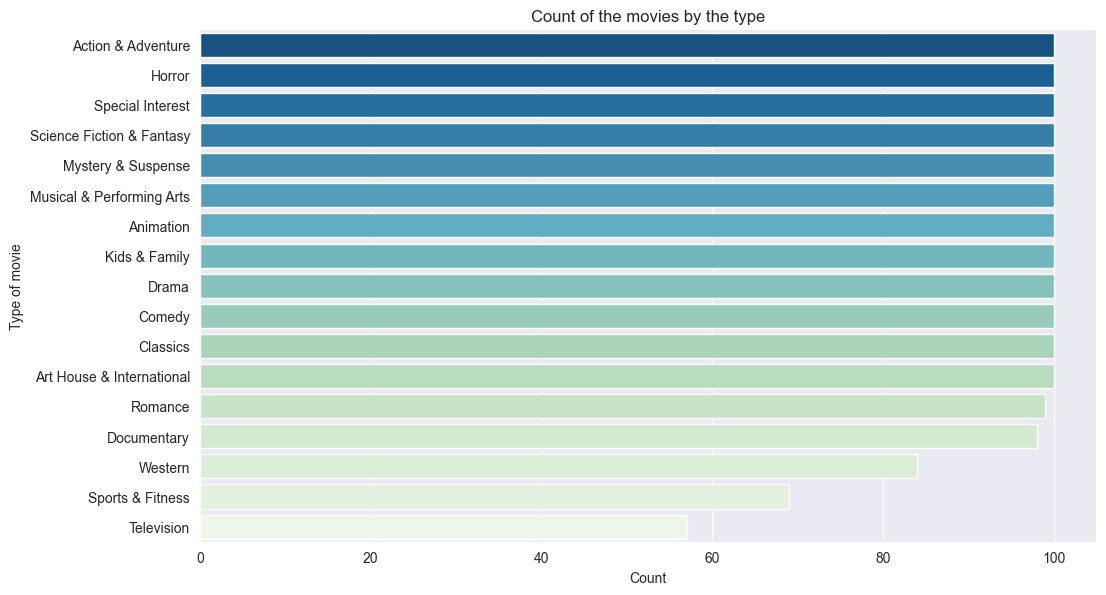

In [48]:
ax = sns.catplot(data=data_non_null_50_plus_ratings,
                y='type', kind ='count',palette = 'GnBu_r',
                order=total_by_type.index)
ax.figure.set_size_inches(16,6)
ax.set_axis_labels('Count','Type of movie')
ax.set(title='Count of the movies by the type')

### Analysis and visualization of the critic score by type of movie

In [70]:
movie_by_mean_critic_score = data_non_null_50_plus_ratings.groupby(['type']).critic_score.mean().sort_values(ascending=False)
movie_by_mean_critic_score

type
Documentary                  98.234694
Classics                     97.790000
Art House & International    97.670000
Special Interest             96.340000
Mystery & Suspense           95.990000
Drama                        95.920000
Comedy                       95.850000
Romance                      95.787879
Musical & Performing Arts    94.740000
Action & Adventure           94.400000
Science Fiction & Fantasy    94.010000
Animation                    93.820000
Kids & Family                93.680000
Horror                       92.880000
Sports & Fitness             77.130435
Television                   76.157895
Western                      69.750000
Name: critic_score, dtype: float64

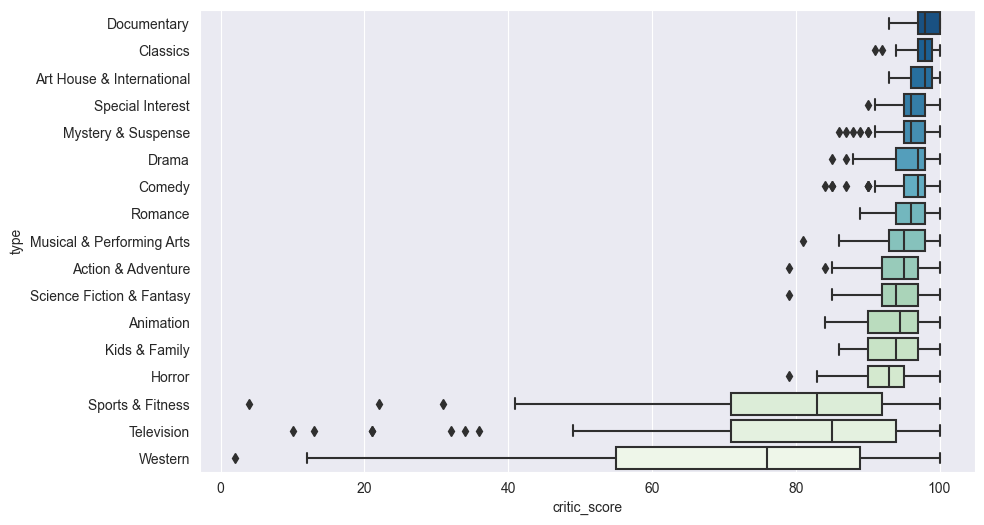

In [71]:
ax = sns.boxplot(data=data_non_null_50_plus_ratings,y='type',x='critic_score',palette = 'GnBu_r', order=movie_by_mean_critic_score.index)
ax.figure.set_size_inches(10, 6)